In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def percent(value):
    return "{0:.0%}".format(value)

In [3]:
dataset = pd.read_csv("iris.csv", header=None)

In [4]:
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [6]:
from sklearn.preprocessing import LabelEncoder

label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC

classifier = SVC()

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,],
              'kernel': ['rbf', 'linear']}]

grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'kernel': ['rbf', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [12]:
print("Best Accuracy: {}".format(percent(grid_search.best_score_))) 

Best Accuracy: 96%


In [13]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [14]:
classifier = SVC(C=1, kernel='linear', gamma=0.1)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [17]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(classifier, X_train, y_train, cv=10)

In [18]:
accuracy

array([0.92307692, 1.        , 1.        , 1.        , 0.83333333,
       0.83333333, 1.        , 1.        , 1.        , 1.        ])

In [30]:
for single_acc in accuracy:
    print(percent(single_acc), end=' ')

92% 100% 100% 100% 83% 83% 100% 100% 100% 100% 

In [19]:
print("Accuracy: {}".format(percent(accuracy.mean()))) 

Accuracy: 96%


In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [26]:
features = X[:, :-2]
y_kmeans = kmeans.fit_predict(features)

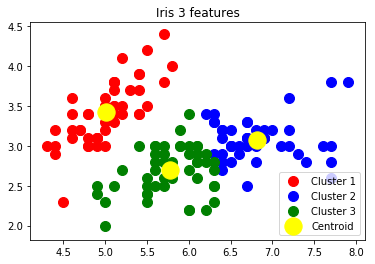

In [29]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title("Iris 3 features")
plt.legend()
plt.show()